In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow   #because google wont allow this lib from cv2 we use colab patches
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)  #changes wont happen every time we run the code
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

# **Loading MNIST data**

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
type(x_train)

numpy.ndarray

# **Shape**

In [ ]:
print(x_train.shape)

(60000, 28, 28)


In [ ]:
print((x_train.shape,y_train.shape),(x_test.shape,y_test.shape))

((60000, 28, 28), (60000,)) ((10000, 28, 28), (10000,))


**Training data has 60000 images
Testing has 10000 images**

In [ ]:
print(x_train.shape)

(60000, 28, 28)


In [ ]:
print(x_train[11])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  31  40 129 234 234 159   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [ ]:
print(x_train[11].shape)

(28, 28)


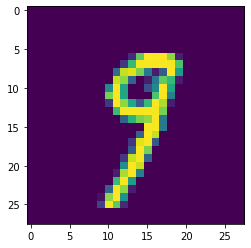

9


In [ ]:
plt.imshow(x_train[43])
plt.show()

print(y_train[43])

# Lets see y train and test

In [ ]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


# **Unique Values in y train**


In [ ]:
print(np.unique(y_train))


[0 1 2 3 4 5 6 7 8 9]


In [ ]:
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
print(x_train.shape)

(60000, 28, 28)


**bcoz maximum value in data is 255 we divide by 255 for scaling purpose**

**Every value will be between 0 and 1**

In [ ]:
x_train = x_train/255
x_test = x_test/255

**display after change**

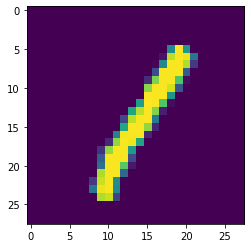

1


In [ ]:
plt.imshow(x_train[23])
plt.show()

print(y_train[23])

# **Visually**

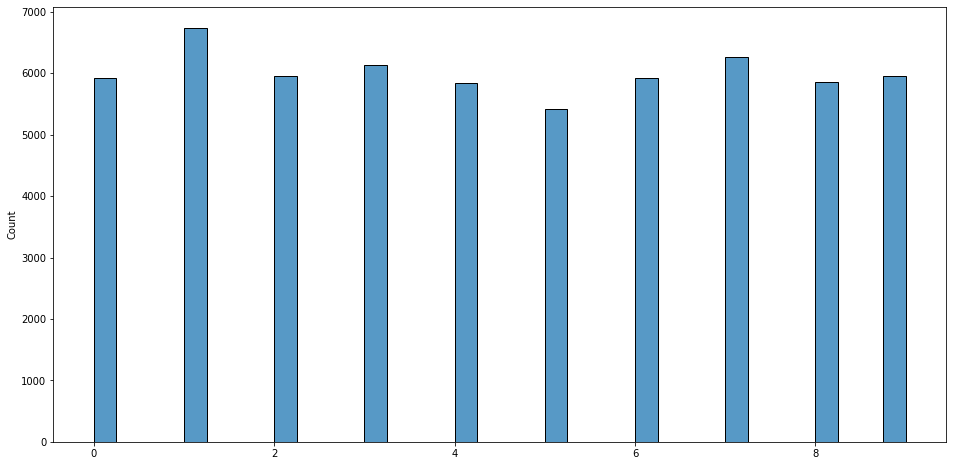

In [ ]:
plt.figure(figsize=(16,8))
sns.histplot(y_train)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


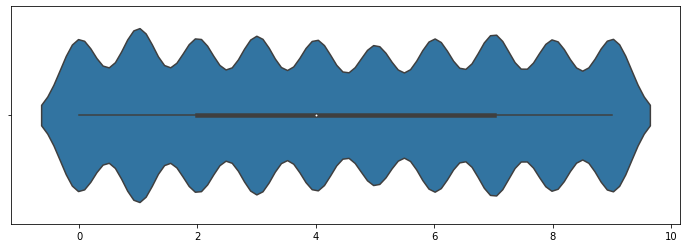

In [ ]:
plt.figure(figsize=(12,4))
sns.violinplot(y_train)

# **Neural Network**

**we use flatten because we cannot import values as matrix form but we want single value and flatten does the work**

In [ ]:
model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28,28)),
      keras.layers.Dense(50,activation='relu'),
      keras.layers.Dense(50,activation='relu'),
  keras.layers.Dense(10,activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )


In [ ]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


# **Training Data accuracy**

In [ ]:
model.fit(x_train,y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2886 - accuracy: 0.9159
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1361 - accuracy: 0.9596
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1018 - accuracy: 0.9690
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0826 - accuracy: 0.9748
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0685 - accuracy: 0.9788
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0584 - accuracy: 0.9813
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0512 - accuracy: 0.9836
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0447 - accuracy: 0.9855
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0401 - accuracy: 0.9870
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.036

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 50)                39250     
                                                                 
 dense_10 (Dense)            (None, 50)                2550      
                                                                 
 dense_11 (Dense)            (None, 10)                510       
                                                                 
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


# **Testing data accuracy**

In [ ]:
loss,accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0948 - accuracy: 0.9764


# **we can see the value here in x_test is 2 therefore lets predict its true label to check how accurate our model is**

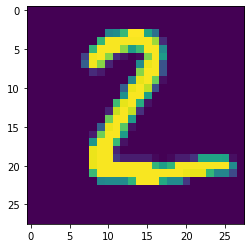

In [ ]:
plt.imshow(x_test[1])
plt.show()

**the true label is 2**

In [ ]:
print(y_test[1])

2


# **as we know the image and true label lets give it to the model to see if it predicts accurately**

In [ ]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [ ]:
print(y_pred.shape)

(10000, 10)


**Here our prediction for image in x_test[1] is correct i.e. 2**

In [ ]:
prediction = np.argmax(y_pred[1])
print(prediction)

2


# **the relu activation function gave us a accuracy of 98%**

# **Now lets change the activation function and see our accuracy**


In [ ]:
model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28,28)),
      keras.layers.Dense(50,activation='sigmoid'),
      keras.layers.Dense(50,activation='sigmoid'),
  keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [ ]:
model.fit(x_train,y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5932 - accuracy: 0.8604
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2115 - accuracy: 0.9396
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1559 - accuracy: 0.9550
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1261 - accuracy: 0.9642
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1050 - accuracy: 0.9700
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0898 - accuracy: 0.9742
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0796 - accuracy: 0.9768
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0698 - accuracy: 0.9798
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0619 - accuracy: 0.9825
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.055

313/313 [==============================] - 1s 3ms/step - loss: 0.1002 - accuracy: 0.9709


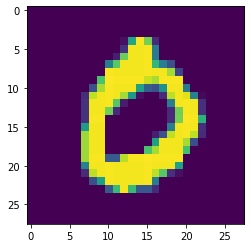

In [ ]:
loss,accuracy = model.evaluate(x_test,y_test)
plt.imshow(x_test[3])
plt.show()


In [ ]:
print(y_test[3])

0


In [ ]:
y_pred = model.predict(x_test)
print(y_pred.shape)
prediction = np.argmax(y_pred[3])
print(prediction)

313/313 [==============================] - 1s 3ms/step
(10000, 10)
0


# **So the activation function sigmoid gave us a good accuracy of 98%**

# **Now lets change the optimizer from adam to adaDelta with activation function as sigmoid**

In [ ]:
model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28,28)),
      keras.layers.Dense(50,activation='sigmoid'),
      keras.layers.Dense(50,activation='sigmoid'),
  keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adaDelta',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [ ]:
model.fit(x_train,y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.4699 - accuracy: 0.1020
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.4297 - accuracy: 0.1035
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3952 - accuracy: 0.1167
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3653 - accuracy: 0.1653
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3393 - accuracy: 0.2161
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3167 - accuracy: 0.2506
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2968 - accuracy: 0.2665
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2794 - accuracy: 0.2753
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2638 - accuracy: 0.2816
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.249

313/313 [==============================] - 1s 2ms/step - loss: 2.2422 - accuracy: 0.2929


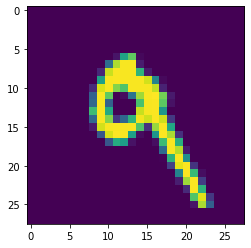

In [ ]:
loss,accuracy = model.evaluate(x_test,y_test)
plt.imshow(x_test[7])
plt.show()

In [ ]:
print(y_test[7])

9


In [ ]:
y_pred = model.predict(x_test)
print(y_pred.shape)
prediction = np.argmax(y_pred[7])
print(prediction)

313/313 [==============================] - 1s 4ms/step
(10000, 10)
6


# **So like the accuracy here we got was around 29% which is really low and so the prediction was also not correct the image was 9 but model predicted it as 6**

#**Lets check adamDelta optimizer with relu activation function**

In [ ]:
model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28,28)),
      keras.layers.Dense(50,activation='relu'),
      keras.layers.Dense(50,activation='relu'),
  keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adaDelta',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [ ]:
model.fit(x_train,y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3271 - accuracy: 0.0736
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2615 - accuracy: 0.1207
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2043 - accuracy: 0.2000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1513 - accuracy: 0.2709
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.0997 - accuracy: 0.3223
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.0474 - accuracy: 0.3616
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9932 - accuracy: 0.4035
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9365 - accuracy: 0.4438
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8772 - accuracy: 0.4862
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.815

313/313 [==============================] - 1s 2ms/step - loss: 1.7678 - accuracy: 0.5642


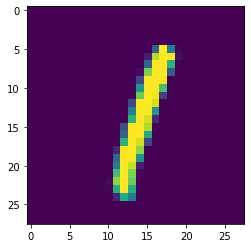

In [ ]:
loss,accuracy = model.evaluate(x_test,y_test)
plt.imshow(x_test[5])
plt.show()

In [ ]:
print(y_test[5])

1


In [ ]:
y_pred = model.predict(x_test)
print(y_pred.shape)
prediction = np.argmax(y_pred[5])
print(prediction)

313/313 [==============================] - 1s 3ms/step
(10000, 10)
1


# **Here the accuracy is around 56% like not very good , the prediction by the model was correct however we cannot consider accuracy this low**

# **Lets download an image to test our model prediction I have downloaded image 6 in this case**

In [ ]:
image = '/content/images (1).jfif'
input_image = cv2.imread(image)

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)

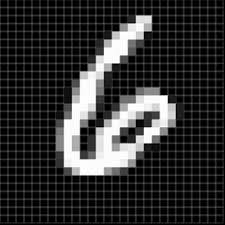

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(225, 225, 3)

# **Now this image is rgb image and we trained our model in non rgb images so we convert this into grayscale**

In [ ]:
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

(225, 225)

In [ ]:
input_image_resize = cv2.resize(grayscale,(28,28))

In [ ]:
input_image_resize.shape

(28, 28)

**the image finally**

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize = input_image_resize/255

**To let our model know that we are only providing one image**

In [ ]:
image_reshaped = np.reshape(input_image_resize,[1,28,28])

In [ ]:
prediction = model.predict(image_reshaped)
print(prediction)

1/1 [==============================] - 0s 27ms/step
[[0.69031566 0.26450628 0.53583735 0.37799552 0.50050306 0.38983324
  0.7287502  0.5942164  0.53149414 0.64202553]]


In [ ]:
final_pred = np.argmax(prediction)

In [ ]:
print(final_pred)

6


# **So here we can see our model has predicted the image accurately**